## Linear Regression

In [49]:
import numpy as np 
import matplotlib.pyplot as plt 
% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Linear regression with one variable

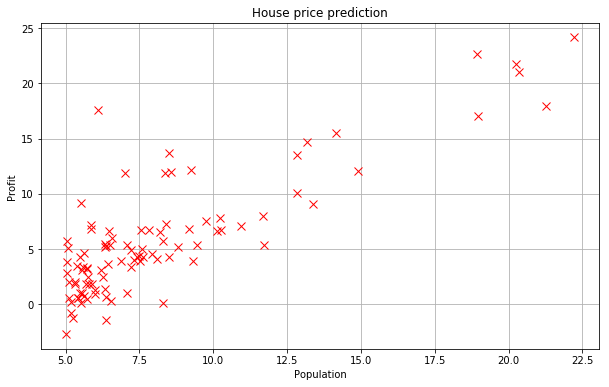

In [10]:
def data_loading(file_name):
    data=np.loadtxt(file_name,delimiter=',',unpack=True)
    X=np.transpose(data[:-1]) # [:-1] all except for the last one
    X=np.insert(X,0,1,axis=1)
    y=np.transpose(data[-1:])
    return X,y

[X,y]=data_loading('ex1data1.txt')

plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=8)
plt.grid(True)
plt.title('House price prediction')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

### Gradiant Descent

#### hypothesis
$$h _ { \theta } ( x ) = \theta ^ { T } x = \theta _ { 0 } + \theta _ { 1 } x _ { 1 }$$
#### cost function
$$
J ( \theta ) = \frac { 1 } { 2 m } \sum _ { i = 1 } ^ { m } \left( h _ { \theta } \left( x ^ { ( i ) } \right) - y ^ { ( i ) } \right) ^ { 2 }
$$

In [3]:
# linear hypothesis function
def h(theta,X): 
    return np.dot(X,theta)

# cost function
def compute_cost(ini_theta,X,y):
    m=len(y)
    return (1./(2*m)) * np.dot((h(ini_theta,X)-y).T,(h(ini_theta,X)-y))  # vector

ini_theta=np.zeros((X.shape[1],1))
print(float(compute_cost(ini_theta,X,y)))

32.072733877455676


#### batch gradient descent
$$
\theta _ { j } : = \theta _ { j } - \alpha \frac { 1 } { m } \sum _ { i = 1 } ^ { m } \left( h _ { \theta } \left( x ^ { ( i ) } \right) - y ^ { ( i ) } \right) x _ { j } ^ { ( i ) }
$$

In [5]:
# grandiant descent 
iteration=1500
alpha=0.01

def gradient_descent(X,theta):
    j_record=[]
    theta_record=[]
    m=len(X)
    for i in range(iteration):
        j_record.append(float(compute_cost(theta,X,y)))
        theta_record.append(list(theta[:,0].copy()))
        theta-=(alpha/m)*np.dot(X.transpose(),h(theta,X)-y)
    return j_record,theta_record

[j_record,theta_record]=gradient_descent(X,ini_theta)

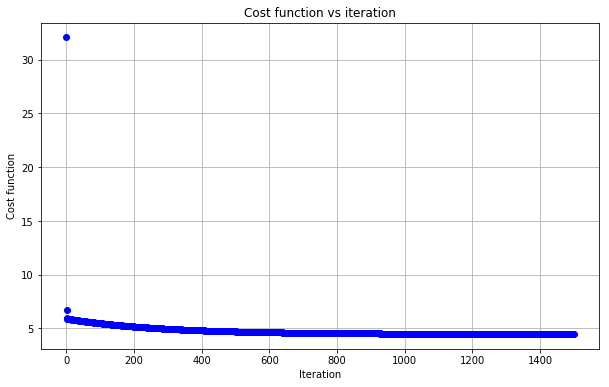

In [6]:
plt.figure(figsize=(10,6))
plt.plot(range(iteration),j_record,'bo')
plt.grid(True)
plt.title('Cost function vs iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost function')
plt.show()

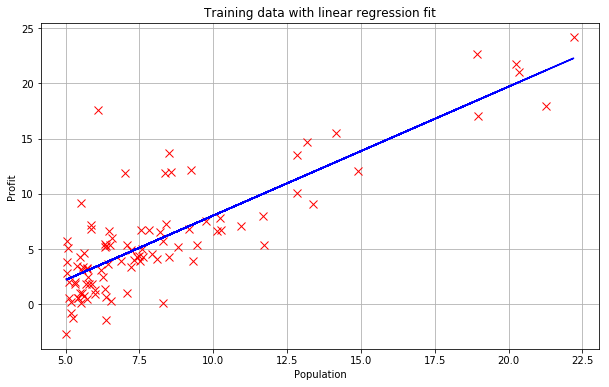

In [7]:
theta=theta_record[-1]
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=8,label='Training')
plt.plot(X[:,1],np.dot(X,theta),'b-',label='Hypothesis Trained')
plt.grid(True)
plt.title('Training data with linear regression fit')
plt.ylabel('Profit')
plt.xlabel('Population')
plt.show()

### Visualizing J($\theta$)

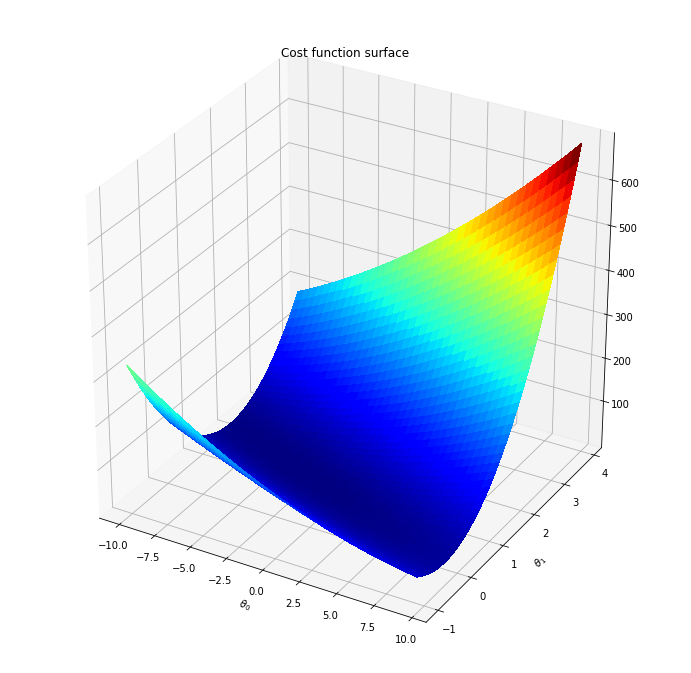

In [8]:
from mpl_toolkits.mplot3d import axes3d,Axes3D
from matplotlib import cm
import itertools

# surface
fig=plt.figure(figsize=(12,12))
ax=fig.gca(projection='3d')
theta_0=np.arange(-10,10,0.5)
theta_1=np.arange(-1,4,0.1)
cost_record=np.zeros((len(theta_1),len(theta_0)))
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        temp=compute_cost([[theta_0[i]],[theta_1[j]]],X,y)
        cost_record[j,i]=temp
theta_0,theta_1=np.meshgrid(theta_0,theta_1) # plot sursafe expect x,y to be 2d
surface=ax.plot_surface(theta_0,theta_1,cost_record,cmap=cm.jet,linewidth=0,antialiased=False)

plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Cost function surface')
plt.show()

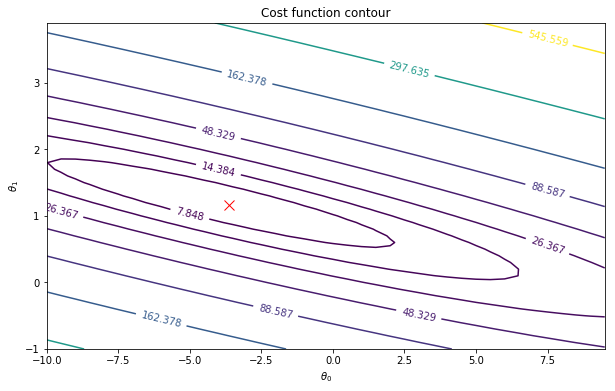

In [9]:
# contour
fig,ax=plt.subplots(figsize=(10,6))
cs=ax.contour(theta_0,theta_1,cost_record,np.logspace(-2,3,20))
ax.set_title('Cost function contour')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.clabel(cs, inline=1, fontsize=10)
ax.plot(theta[0],theta[1],'rx',markersize=10) # best solution
plt.show()

### Linear regression with multiple variables

In [11]:
[X,y]=data_loading('ex1data2.txt')

In [39]:
def feature_normalization(X):
    mu=np.mean(X,axis=0) # axis=0 is by col
    sigma=np.std(X,axis=0)
    X_norm=(X-mu)/sigma
    X_norm[:,0]=1 # skip the first column
    return mu,sigma,X_norm

In [50]:
[mu,sigma,X_norm]=feature_normalization(X)
ini_theta=np.zeros((X_norm.shape[1],1))
[j_record,theta_record]=gradient_descent(X_norm,ini_theta)

In [51]:
# test 
theta=theta_record[-1]
x_test=[1,1650,3]
x_test=(x_test-mu)/sigma
x_test[0]=1
y_test=np.dot(x_test,theta)
print('Prediction: $'+str(y_test))

Prediction: $293098.541274


#### Nomal equation
$$
\theta = \left( X ^ { T } X \right) ^ { - 1 } X ^ { T } \vec { y }
$$

In [ ]:
# does not requre any feature scaling
from numpy.linalg import inv
def normal_equation(X,y):
    return np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)